In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from env import url

import warnings
warnings.filterwarnings("ignore")

## Exercises 1
Clustering with the Iris Dataset

In [2]:
iris = sns.load_dataset('iris')

Using this lesson as a guide, perform clustering on the iris dataset.

1. Choose features other than the ones used in the lesson.

In [3]:
X = iris[['petal_length', 'petal_width']]

2. Visualize the results of your clustering.

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

iris['cluster'] = kmeans.predict(X)

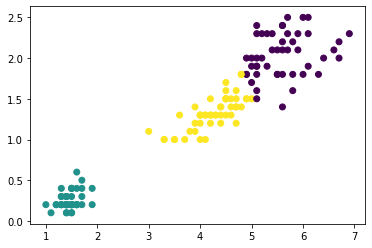

In [5]:
plt.scatter(iris.petal_length, iris.petal_width, c=iris.cluster)

3. Use the elbow method to visually select a good value for k.

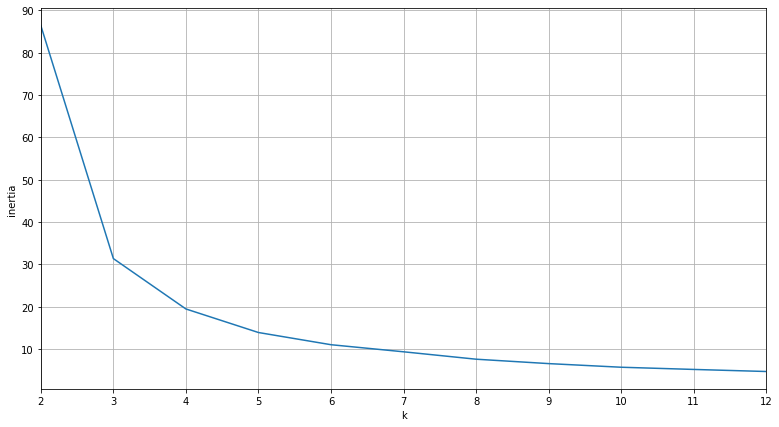

In [6]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()


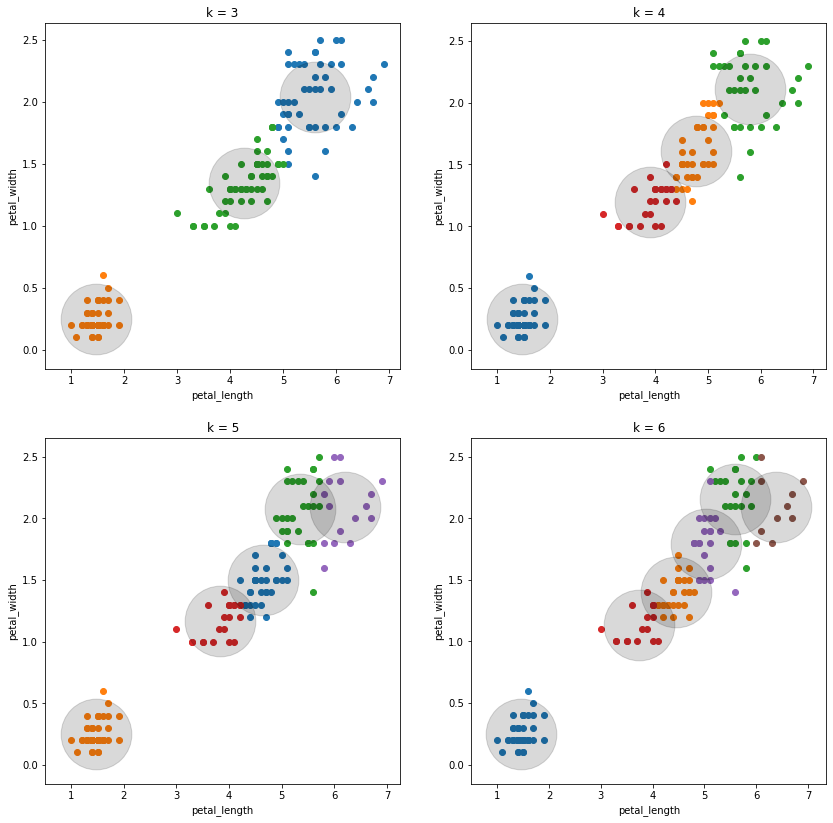

In [7]:
plt.figure(figsize=(14, 14))
for i, k in enumerate([3, 4, 5, 6]):
    plt.subplot(2, 2, i + 1)
    kmeans = KMeans(k)
    kmeans.fit(X)
    iris['cluster'] = kmeans.predict(X)
    iris.cluster = 'cluster ' + iris.cluster.astype(str)
    for cluster, subset in iris.groupby('cluster'):
        plt.scatter(subset.petal_length, subset.petal_width, label=cluster)

    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    centroids.plot.scatter(y='petal_width', x='petal_length', ax=plt.gca(), alpha=.15, s=5000, c='black')
    plt.title(f'k = {k}')

4. Repeat the clustering, this time with 3 different features.

In [8]:
X = iris[['petal_length', 'petal_width', 'sepal_width']]

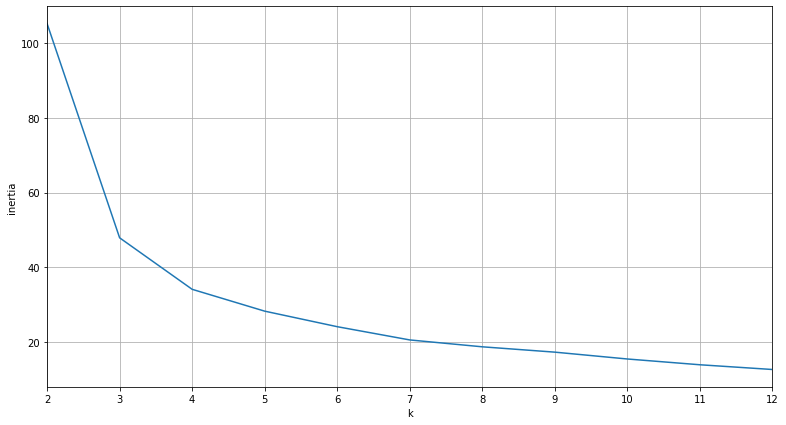

In [9]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()


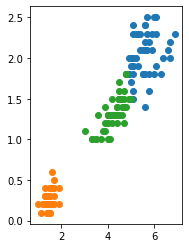

In [10]:
plt.subplot(1, 2, 1 )
kmeans = KMeans(3)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster ' + iris.cluster.astype(str)
for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.petal_length, subset.petal_width, label=cluster)


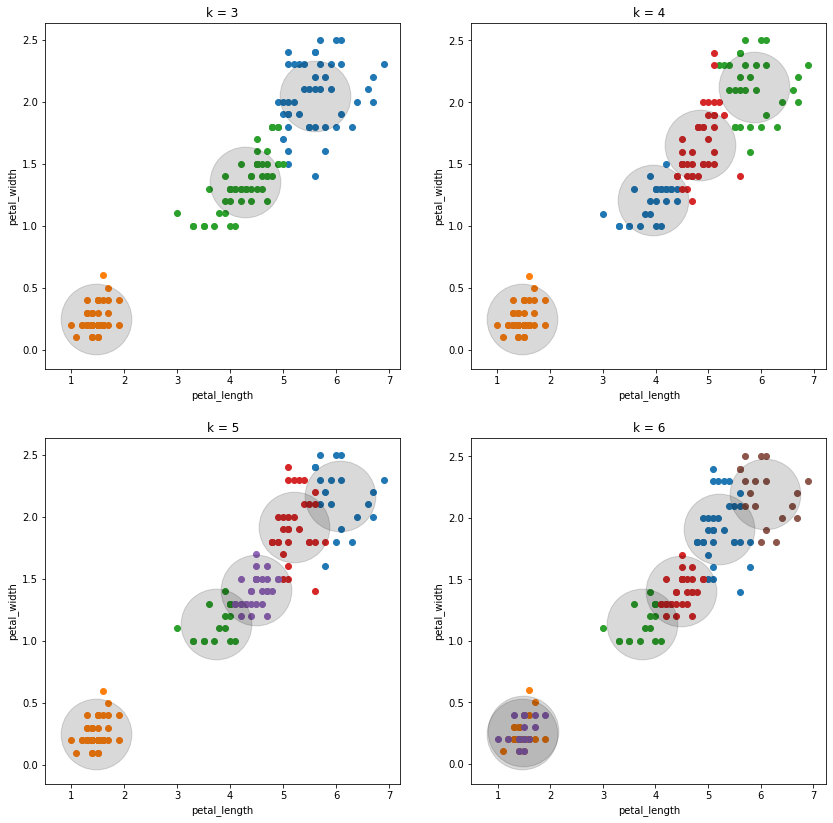

In [11]:
plt.figure(figsize=(14, 14))
for i, k in enumerate([3, 4, 5, 6]):
    plt.subplot(2, 2, i + 1)
    kmeans = KMeans(k)
    kmeans.fit(X)
    iris['cluster'] = kmeans.predict(X)
    iris.cluster = 'cluster ' + iris.cluster.astype(str)
    for cluster, subset in iris.groupby('cluster'):
        plt.scatter(subset.petal_length, subset.petal_width, label=cluster)

    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    centroids.plot.scatter(y='petal_width', x='petal_length', ax=plt.gca(), alpha=.15, s=5000, c='black')
    plt.title(f'k = {k}')

K =4 looks like a good choise from the visualization above

## Exercises 2
Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [12]:
query = 'Select * From customers'
df = pd.read_sql(query, url('mall_customers'))
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
X = df[['age', 'annual_income', 'spending_score']]

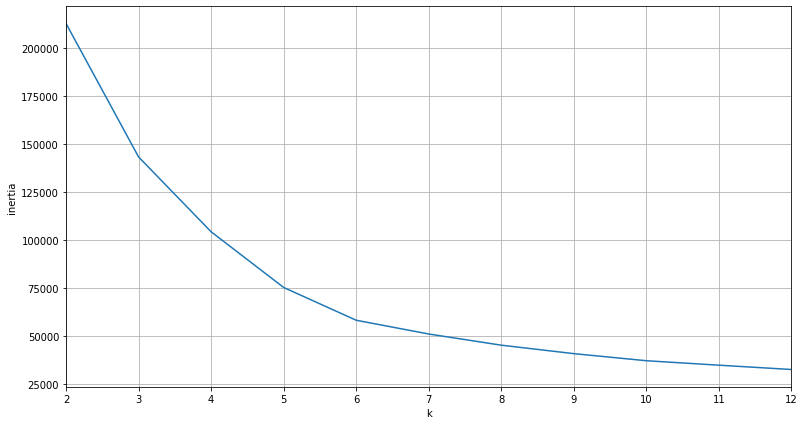

In [14]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

K  = 6 looks like the optimal poing

## Exercises 3
How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [15]:
scaler = MinMaxScaler()
df[['age', 'annual_income', 'spending_score']] = scaler.fit_transform(X)

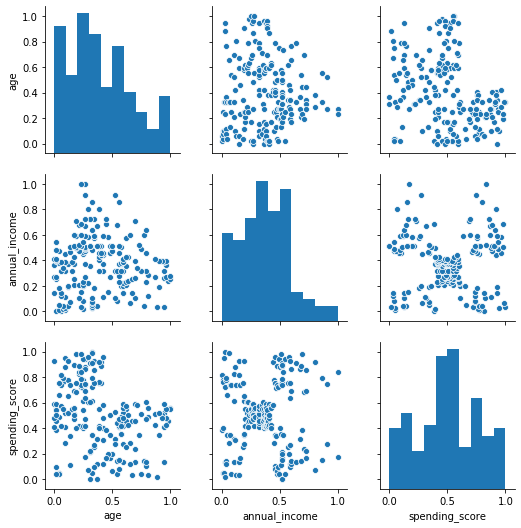

In [16]:
sns.pairplot(df.drop(columns = 'customer_id'))

In [17]:
X = df[[ 'annual_income', 'spending_score']]

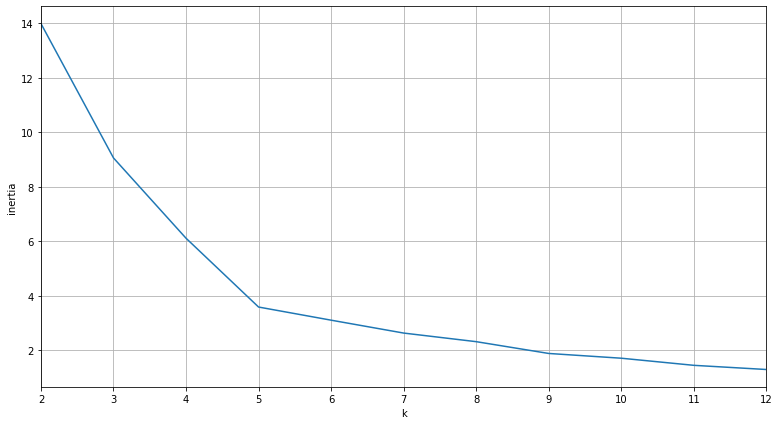

In [18]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

K =4 looks like the elbow point

In [19]:
X =df[['annual_income', 'spending_score']]
kmeans = KMeans(5)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)
df.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,0.019231,0.000000,0.387755,3
1,2,Male,0.057692,0.000000,0.816327,4
2,3,Female,0.038462,0.008197,0.051020,3
3,4,Female,0.096154,0.008197,0.775510,4
4,5,Female,0.250000,0.016393,0.397959,3


In [20]:
df.cluster.value_counts()

1    81
0    39
2    35
3    23
4    22
Name: cluster, dtype: int64

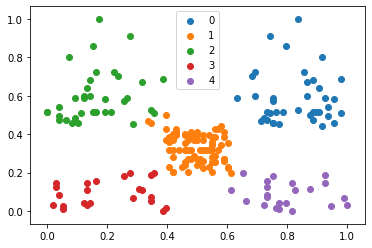

In [31]:
for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.spending_score, subset.annual_income, label=cluster)
plt.legend()

In [32]:
x =pd.DataFrame({'annual_income':[0.8], 'spending_score':[0.6 ]})

In [33]:
kmeans.predict(x)

array([0], dtype=int32)